# Testing a Multi-Layer Perceptron to map 1D representation of a Coulomb Matrix to XYZ coordinates 

In [1]:
import os
import numpy as np
from formatData import loadData
from sklearn.model_selection import train_test_split
from coulombToTraj import *
import pathlib

2023-04-20 16:47:44.136937: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Importing the Data and fitting the model
<br> Note: defination of the functions are in coulombToTraj.py

In [2]:
xyz_files_dir_name = "/home/panthibivek/thesis/GAN_pkg/data/AllMolecules/"
xyz_traj_filename = "/home/panthibivek/thesis/GAN_pkg/data/traj.xyz"
print("Loading Lower Coulomb representation and respective energies")
molRep2D, _ = loadData(12, xyz_traj_filename)

molRep2D_without_diagonal = []
diagonal_index = [1,3,6,10,15,21,28,36,45,55,66,78]
index = np.array([i-1 for i in range(1,78) if i not in diagonal_index])

for each_molRep2D in molRep2D:
    each_molRep2D_without_diagonal = each_molRep2D[index]
    molRep2D_without_diagonal.append(each_molRep2D_without_diagonal)
molRep2D_without_diagonal = np.array(molRep2D_without_diagonal)

# charge of all atoms in benzene
atomic_charge = np.repeat(np.array([[6,6,6,6,6,6,1,1,1,1,1,1]]), len(molRep2D), axis=0)
molRep2D_with_atomic_charge = np.concatenate((atomic_charge, molRep2D_without_diagonal), axis=1)

flatened_xyz = np.array(getFlattenedXyz(xyz_files_dir_name))
X_train, X_test, y_train, y_test = train_test_split(molRep2D_with_atomic_charge, flatened_xyz,
                                test_size=0.3)
model = getModel()
history = model.fit(X_train, y_train, epochs=70)

Loading Lower Coulomb representation and respective energies
input data size: (10000, 78)
output data size: (10000,)


2023-03-26 21:59:07.301194: I tensorflow/compiler/xla/stream_executor/rocm/rocm_gpu_executor.cc:843] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-26 21:59:07.301288: I tensorflow/compiler/xla/stream_executor/rocm/rocm_gpu_executor.cc:843] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-26 21:59:07.356784: I tensorflow/compiler/xla/stream_executor/rocm/rocm_gpu_executor.cc:843] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-26 21:59:07.356848: I tensorflow/compiler/xla/stream_executor/rocm/rocm_gpu_executor.cc:843] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-26 21:59:07.356888: I tensorflow/compiler/xla/stream_executo

Epoch 1/70


2023-03-26 21:59:07.573389: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-26 21:59:07.573994: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-26 21:59:07.582370: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-26 21:59:07.583099: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-26 21:59:07.589293: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-26 21:59:07.590666: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-26 21:59:07.599826: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-26 21:59:07.601101: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-26 21:59:07.601839: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-26 21:59:07

 28/219 [==>...........................] - ETA: 1s - loss: 24.9091

2023-03-26 21:59:08.985049: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


219/219 [==============================] - 3s 6ms/step - loss: 11.3744
Epoch 2/70
 28/219 [==>...........................] - ETA: 1s - loss: 3.4696

2023-03-26 21:59:10.306332: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-26 21:59:10.307197: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-26 21:59:10.307722: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-26 21:59:10.309158: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


219/219 [==============================] - 1s 6ms/step - loss: 2.9440
Epoch 3/70
219/219 [==============================] - 1s 6ms/step - loss: 2.6644
Epoch 4/70
219/219 [==============================] - 1s 6ms/step - loss: 2.5449
Epoch 5/70
219/219 [==============================] - 1s 6ms/step - loss: 2.5278
Epoch 6/70
219/219 [==============================] - 1s 6ms/step - loss: 2.5560
Epoch 7/70
219/219 [==============================] - 1s 6ms/step - loss: 2.4978
Epoch 8/70
219/219 [==============================] - 1s 6ms/step - loss: 2.4841
Epoch 9/70
219/219 [==============================] - 1s 6ms/step - loss: 2.5603
Epoch 10/70
219/219 [==============================] - 1s 6ms/step - loss: 2.7396
Epoch 11/70
219/219 [==============================] - 1s 6ms/step - loss: 2.5607
Epoch 12/70
219/219 [==============================] - 1s 6ms/step - loss: 2.5207
Epoch 13/70
219/219 [==============================] - 1s 6ms/step - loss: 2.4896
Epoch 14/70
219/219 [==============

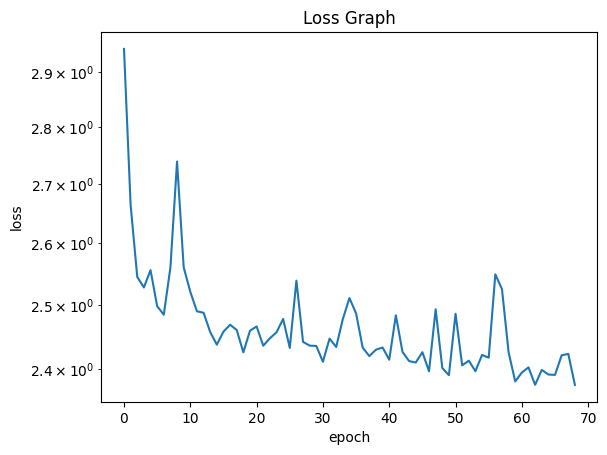

In [3]:
from matplotlib import pyplot as plt
loss_arr = history.history['loss']
plt.plot(loss_arr[1:])
plt.yscale('log')
plt.title('Loss Graph')
plt.ylabel('loss')
plt.xlabel('epoch')
fig1 = plt.gcf()
plt.show()
fig1.savefig('coulomb_to_xyz_loss.png', dpi = 300)

In [4]:
parent_dir_coulomb1D_to_xyz = pathlib.Path(os.path.abspath(os.path.dirname('__file__')) + "/runs/ModelForCoulombToXyz")
parent_dir_coulomb1D_to_xyz.mkdir(parents=True, exist_ok=True)
model.save(str(parent_dir_coulomb1D_to_xyz) + '/model.h5')

2023-03-26 22:00:41.956625: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-26 22:00:41.958805: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-26 22:00:41.963336: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-26 22:00:41.966050: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-26 22:00:41.968539: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-26 22:00:41.970672: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-26 22:00:41.972012: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-26 22:00:41.975316: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-26 22:00:41.977635: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-26 22:00:41

In [5]:
result_arr = model.predict(X_test)
print()
print("Deviation:", np.std(y_test - result_arr))
print("MSE: ", np.mean((y_test - result_arr)**2))

2023-03-26 22:00:42.068392: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-26 22:00:42.069353: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-26 22:00:42.077072: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-26 22:00:42.078061: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-26 22:00:42.078616: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-26 22:00:42.079193: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-26 22:00:42.083550: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-26 22:00:42.084490: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-26 22:00:42.085195: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-26 22:00:42

29/94 [========>.....................] - ETA: 0s

2023-03-26 22:00:42.188527: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


94/94 [==============================] - 0s 1ms/step

Deviation: 1.6639261888769787
MSE:  2.769264758972836


2023-03-26 22:00:42.320064: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-26 22:00:42.320886: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-26 22:00:42.335842: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-26 22:00:42.337403: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-26 22:00:42.337913: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-26 22:00:42.338398: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-26 22:00:42.340181: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


In [6]:
from gan import load_weight
from gan import GenAdvNetwork
import tensorflow as tf
from utils import random_generator
from reformatToXyz import format_xyz_samples

In [7]:
latent_dim_ = 32
batch_size_ = 16
weights_path = "/home/panthibivek/thesis/GAN_pkg/runs/train/exp2/weights/"
GanModel = GenAdvNetwork(latent_dim=latent_dim_, batch_size=batch_size_)
GanModel.compile(
    generator_opt=tf.keras.optimizers.Adam(learning_rate=0.001),
    discriminator_opt=tf.keras.optimizers.Adam(learning_rate=0.001),
    disc_loss=tf.keras.losses.BinaryCrossentropy(),
    gen_loss=tf.keras.losses.MAE
)

random_data = random_generator((10000, latent_dim_))

GanModel.generator(random_data)
GanModel.load_weights(weights_path) 
generated_output = GanModel.generator(random_data)
arr = generated_output.numpy()
arr_new = arr.reshape((10000,78))

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 13)                1027      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 13)                0         
                                                                 
 reshape (Reshape)           (None, 13, 1)             0         
                                                                 
 conv1d_transpose (Conv1DTra  (None, 39, 128)          640       
 nspose)                                                         
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 39, 128)           0         
                                                                 
 batch_normalization_6 (Batc  (None, 39, 128)          512       
 hNormalization)                                         

2023-03-26 22:00:42.437528: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-26 22:00:42.438236: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-26 22:00:42.439090: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-26 22:00:42.439555: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-26 22:00:42.450668: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-26 22:00:42.451227: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-26 22:00:42.473074: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-26 22:00:42.473670: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-26 22:00:42.474441: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-26 22:00:42

Model: "discriminator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 26, 64)            320       
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 26, 64)            0         
                                                                 
 conv1d_2 (Conv1D)           (None, 13, 128)           32896     
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 13, 128)           0         
                                                                 
 batch_normalization_8 (Batc  (None, 13, 128)          512       
 hNormalization)                                                 
                                                                 
 flatten (Flatten)           (None, 1664)              0         
                                                     

2023-03-26 22:00:42.523859: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-26 22:00:42.524735: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-26 22:00:42.539364: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-26 22:00:42.540453: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-26 22:00:42.563572: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-26 22:00:42.564117: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-26 22:00:42.589065: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-26 22:00:42.591850: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-26 22:00:42.593539: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-26 22:00:42

In [8]:
# formatted_input_arr = inputFormat(raw_input=arr_new)
# result_arr = model.predict(formatted_input_arr)
result_arr = model.predict(X_test)

parent_dir_coulomb1D_to_xyz = pathlib.Path(os.path.abspath(os.path.dirname('__file__')) + "/data/generatedMoleculesFromTestData")
parent_dir_coulomb1D_to_xyz.mkdir(parents=True, exist_ok=True)

for idx in range(len(result_arr)):
    filename = str(parent_dir_coulomb1D_to_xyz) + "/molecule{:06d}.xyz".format(idx)
    format_xyz_samples(generated_sample=result_arr[idx], filename=filename)

94/94 [==============================] - 0s 1ms/step


2023-03-26 22:00:45.179738: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-26 22:00:45.189119: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-26 22:00:45.193352: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-26 22:00:45.197730: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-26 22:00:45.201096: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-26 22:00:45.203304: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
